In [4]:
# Author Mohamed El Mistiri
# MAE 598

# problem 1
import torch as t
import matplotlib.pyplot as plt
from torch.autograd import Variable
import numpy as np
T = 20
x1 = np.linspace(0,1,11)
x2 = np.linspace(1,0,11)
a_w = np.array([8.07131, 1730.63, 233.426])
a_d = np.array([7.43155, 1554.679, 240.337])
p_w = 10**(a_w[0] - a_w[1]/(T + a_w[2]))
p_d = 10**(a_d[0] - a_d[1]/(T + a_d[2]))
P = np.array([28.1, 34.4, 36.7, 36.9, 36.8, 36.7, 36.5, 35.4, 32.9, 27.7, 17.5])

x1 = t.tensor(x1, requires_grad=False, dtype=t.float32)
x2 = t.tensor(x2, requires_grad=False, dtype=t.float32)

A = Variable(t.tensor([1.0, 1.0]),requires_grad = True)
P = t.tensor(P, requires_grad=False, dtype=t.float32)

alpha = 0.001

for i in range(50):
    P_pred = x1 * t.exp(A[0] * (A[1] * x2/(A[0] * x1 + A[1] * x2))**2) * p_w +\
        x2*t.exp(A[1]*(A[0]*x1/(A[0]*x1 + A[1]*x2))**2) * p_d

    obj = (P_pred - P)**2
    obj = obj.sum()
    obj.backward()

    with t.no_grad():
        A -= alpha*A.grad
        A.grad.zero_()

print('Estimated A_12 ({}) and A_21 ({})'.format(A[0],A[1]))
print('final objective value: ',obj.data.numpy())



Estimated A_12 (1.9579263925552368) and A_21 (1.6895899772644043)
final objective value:  0.67021877


[28.824099 34.641956 36.451256 36.86612  36.872917 36.748806 36.389854
 35.385315 32.949852 27.733002 17.473251]


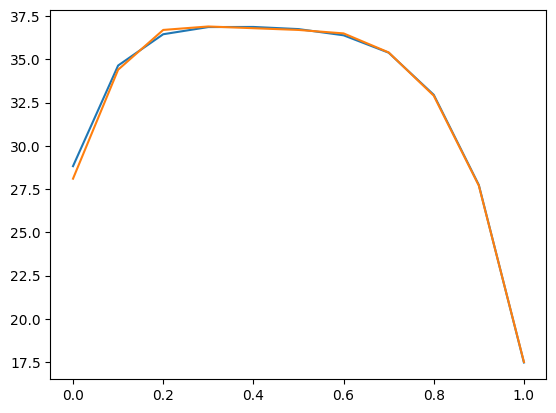

In [2]:
P_pred_plot = P_pred.detach().numpy()
P_plot = P.detach().numpy()
x1 = x1.detach().numpy()
print(P_pred_plot)

plt.plot(x1,P_pred_plot)
plt.plot(x1,P_plot)
plt.show()

In [16]:
## problem 2:

import numpy as np
from bayes_opt import BayesianOptimization

def obj_function(x,y):
    obj = (4 - 2.1*x**2 + (x**4)/3)*x**2 + x*y +  (-4 + 4*y**2)*y**2
    return -obj

# def black_box_function(x, y):
#     """Function with unknown internals we wish to maximize.

#     This is just serving as an example, for all intents and
#     purposes think of the internals of this function, i.e.: the process
#     which generates its output values, as unknown.
#     """
#     return -x ** 2 - (y - 1) ** 2 + 1

# obj_function(1,2)

# Bounded region of parameter space
pbounds = {'x': (-3, 3), 'y': (-2, 2)}

optimizer = BayesianOptimization(
    f=obj_function,
    pbounds=pbounds,
    random_state=10000,
)

optimizer.maximize(
    init_points=50,
    n_iter=50,
)

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        | -4.909    |  0.2728   | -1.313    |
|  2        | -7.22     |  2.118    | -1.279    |
|  3        | -12.14    |  0.5322   | -1.517    |
|  4        | -19.93    |  0.3282   | -1.672    |
|  5        | -94.05    |  2.956    | -0.9891   |
|  6        | -14.84    |  0.1978   |  1.569    |
|  7        | -2.236    | -1.547    | -0.3295   |
|  8        | -5.528    |  2.208    | -0.8547   |
|  9        | -39.87    | -2.174    | -1.797    |
|  10       | -34.98    |  2.57     |  1.12     |
|  11       | -34.64    |  1.167    |  1.814    |
|  12       | -32.13    |  2.592    | -1.17     |
|  13       | -45.65    | -1.66     |  1.99     |
|  14       | -1.039    | -0.04762  | -1.097    |
|  15       | -92.8     |  2.926    |  1.026    |
|  16       | -0.7317   |  0.4955   |  0.2641   |
|  17       | -1.708    | -0.7689   | -0.1881   |
|  18       | -15.3     |  1.904    | -1.592    |


Traceback (most recent call last):
  File "c:\Users\mrelm\OneDrive - Arizona State University\2022 Fall\MAE 598\MAE 598 Design Optimization\Optimization-Design\HW3env\lib\site-packages\bayes_opt\bayesian_optimization.py", line 179, in maximize
    x_probe = next(self._queue)
  File "c:\Users\mrelm\OneDrive - Arizona State University\2022 Fall\MAE 598\MAE 598 Design Optimization\Optimization-Design\HW3env\lib\site-packages\bayes_opt\bayesian_optimization.py", line 25, in __next__
    raise StopIteration("Queue is empty, no more objects to retrieve.")
StopIteration: Queue is empty, no more objects to retrieve.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\mrelm\OneDrive - Arizona State University\2022 Fall\MAE 598\MAE 598 Design Optimization\Optimization-Design\HW3env\lib\site-packages\IPython\core\interactiveshell.py", line 3378, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\

In [17]:
print(-optimizer.max['target'])
for i, res in enumerate(optimizer.res):
    print("Iteration {}: \n\t{}".format(i, res))

-0.24622061209034396
Iteration 0: 
	{'target': -4.908688362059411, 'params': {'x': 0.27282090620107624, 'y': -1.3125387398711563}}
Iteration 1: 
	{'target': -7.2204082722515786, 'params': {'x': 2.1175908569118107, 'y': -1.2791063568260364}}
Iteration 2: 
	{'target': -12.138972989624252, 'params': {'x': 0.5322003007421632, 'y': -1.5169003971915873}}
Iteration 3: 
	{'target': -19.93058490344683, 'params': {'x': 0.32819250276449097, 'y': -1.6718952878473416}}
Iteration 4: 
	{'target': -94.04935004725942, 'params': {'x': 2.9562310484829553, 'y': -0.9891229543806705}}
Iteration 5: 
	{'target': -14.835630782450487, 'params': {'x': 0.19776008096603848, 'y': 1.5685563899586423}}
Iteration 6: 
	{'target': -2.2364890686695853, 'params': {'x': -1.5474382458470815, 'y': -0.3295170437144961}}
Iteration 7: 
	{'target': -5.528351944732738, 'params': {'x': 2.2076729030300575, 'y': -0.8546790356501743}}
Iteration 8: 
	{'target': -39.86832462048212, 'params': {'x': -2.173802017842664, 'y': -1.7968255906